In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import plotly as py
import math
import time
from itertools import cycle, islice
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

In [22]:
df = pd.read_csv('Totals_by_State.csv')
df

,Rank,state,2020_Total_Contributions,2020_Democrats,2020_Republicans,2018_Total_Contributions,2018_Democrats,2018_Republicans,2016_Total_Contributions,2016_Democrats,2016_Republicans
0,30,Alabama,"$72,681,601",26.35%,71.33%,"$24,417,482",29.83%,64.16%,"$21,340,249",25.90%,72.27%
1,47,Alaska,"$20,469,701",35.44%,45.44%,"$4,819,621",49.57%,48.04%,"$6,078,471",41.71%,53.91%
2,19,Arizona,"$159,737,336",46.15%,52.44%,"$50,550,487",42.80%,54.59%,"$52,686,535",41.70%,56.13%
3,31,Arkansas,"$69,797,741",32.79%,65.31%,"$25,956,720",28.72%,69.06%,"$49,490,346",35.51%,62.84%
4,1,California,"$1,671,408,159",69.21%,28.52%,"$616,260,806",67.47%,27.79%,"$756,675,466",68.54%,29.21%
5,14,Colorado,"$196,381,141",62.53%,35.90%,"$52,281,612",54.24%,41.55%,"$73,892,527",57.39%,41.19%
6,20,Connecticut,"$141,963,644",70.59%,27.45%,"$52,931,450",64.12%,32.55%,"$91,105,154",60.39%,36.98%
7,24,Delaware,"$99,319,912",71.84%,27.19%,"$5,799,262",59.49%,38.42%,"$8,606,355",60.40%,37.96%
8,3,District of Columbia,"$810,335,383",66.84%,31.66%,"$511,923,092",57.06%,41.36%,"$481,157,263",56.83%,42.17%
9,5,Florida,"$649,564,630",36.77%,61.24%,"$214,498,755",42.48%,54.01%,"$317,694,017",40.81%,56.57%


In [23]:
states = ["Arizona", "Florida", "Georgia", "Michigan", "Minnesota", "Nevada", "New Hampshire", "North Carolina", "Pennsylvania", "Texas"]
df = df.loc[df.state.isin(states)]
df

,Rank,state,2020_Total_Contributions,2020_Democrats,2020_Republicans,2018_Total_Contributions,2018_Democrats,2018_Republicans,2016_Total_Contributions,2016_Democrats,2016_Republicans
2,19,Arizona,"$159,737,336",46.15%,52.44%,"$50,550,487",42.80%,54.59%,"$52,686,535",41.70%,56.13%
9,5,Florida,"$649,564,630",36.77%,61.24%,"$214,498,755",42.48%,54.01%,"$317,694,017",40.81%,56.57%
10,12,Georgia,"$256,912,683",38.42%,60.09%,"$61,402,643",33.61%,63.22%,"$77,341,241",33.87%,63.89%
22,13,Michigan,"$200,930,159",49.43%,48.99%,"$75,563,731",49.04%,48.67%,"$85,637,741",46.45%,52.01%
23,21,Minnesota,"$126,874,458",62.45%,36.12%,"$50,402,024",55.37%,42.56%,"$47,749,526",53.17%,44.36%
28,9,Nevada,"$325,602,382",31.01%,67.33%,"$158,727,113",31.85%,65.35%,"$126,728,749",30.24%,67.35%
29,40,New Hampshire,"$36,431,819",70.73%,27.77%,"$9,064,179",66.15%,31.21%,"$14,387,923",54.70%,44.04%
33,18,North Carolina,"$174,574,133",49.68%,48.74%,"$52,514,773",44.05%,53.13%,"$65,900,012",43.76%,54.16%
38,11,Pennsylvania,"$265,835,612",60.00%,38.14%,"$105,666,359",56.80%,40.15%,"$160,384,290",65.13%,33.62%
43,4,Texas,"$690,959,847",34.77%,63.27%,"$295,940,533",40.00%,56.33%,"$323,124,854",30.96%,66.61%


In [24]:
columns = ['state', '2020_Total_Contributions', '2018_Total_Contributions', '2016_Total_Contributions']
df = df[columns]
df

,state,2020_Total_Contributions,2018_Total_Contributions,2016_Total_Contributions
2,Arizona,"$159,737,336","$50,550,487","$52,686,535"
9,Florida,"$649,564,630","$214,498,755","$317,694,017"
10,Georgia,"$256,912,683","$61,402,643","$77,341,241"
22,Michigan,"$200,930,159","$75,563,731","$85,637,741"
23,Minnesota,"$126,874,458","$50,402,024","$47,749,526"
28,Nevada,"$325,602,382","$158,727,113","$126,728,749"
29,New Hampshire,"$36,431,819","$9,064,179","$14,387,923"
33,North Carolina,"$174,574,133","$52,514,773","$65,900,012"
38,Pennsylvania,"$265,835,612","$105,666,359","$160,384,290"
43,Texas,"$690,959,847","$295,940,533","$323,124,854"


In [25]:
df[['2020_Total_Contributions', '2018_Total_Contributions','2016_Total_Contributions']] = df[['2020_Total_Contributions', '2018_Total_Contributions','2016_Total_Contributions']].replace('[\$,]','',regex=True).astype(float)
df

,state,2020_Total_Contributions,2018_Total_Contributions,2016_Total_Contributions
2,Arizona,159737336.0,50550487.0,52686535.0
9,Florida,649564630.0,214498755.0,317694017.0
10,Georgia,256912683.0,61402643.0,77341241.0
22,Michigan,200930159.0,75563731.0,85637741.0
23,Minnesota,126874458.0,50402024.0,47749526.0
28,Nevada,325602382.0,158727113.0,126728749.0
29,New Hampshire,36431819.0,9064179.0,14387923.0
33,North Carolina,174574133.0,52514773.0,65900012.0
38,Pennsylvania,265835612.0,105666359.0,160384290.0
43,Texas,690959847.0,295940533.0,323124854.0


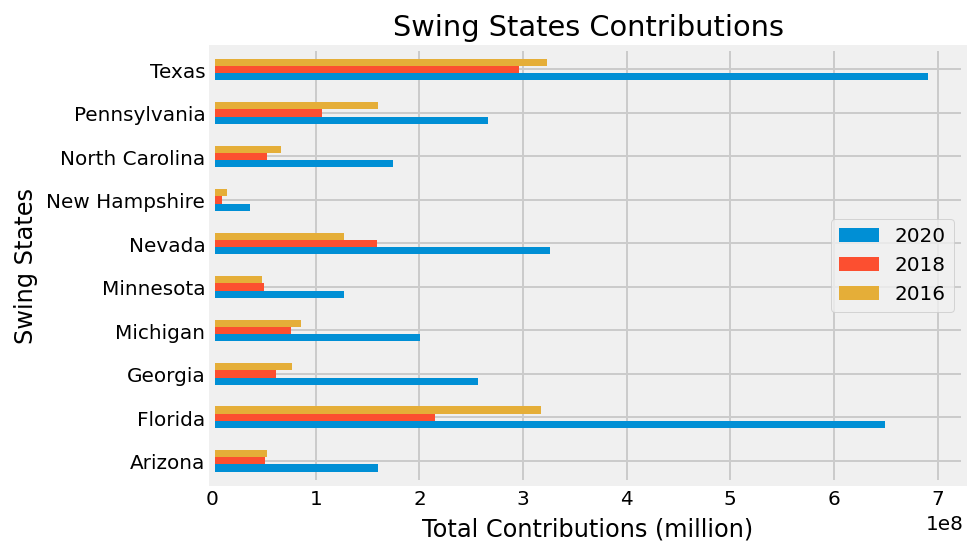

In [26]:
df = pd.DataFrame({'2020': df['2020_Total_Contributions'].tolist(), '2018': df['2018_Total_Contributions'].tolist(), '2016': df['2016_Total_Contributions'].tolist()}, index=df['state'].tolist()) 
df.plot.barh()
plt.xlabel('Total Contributions (million)')
plt.ylabel('Swing State')
plt.title('Swing States Contributions')
plt.show()